# Project 1: General EDA

**Objective:
Perform an in-depth exploratory data analysis (EDA) on a dataset to identify trends, patterns,
anomalies, and factors influencing performance.**

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)

In [3]:
# 1. Dataset Generation
num_records = 100
products = ['Laptop', 'Chair', 'Pen', 'Desk', 'Phone', 'Monitor', 'Notebook', 'Printer']
regions = ['North America', 'Europe', 'Asia', 'South America', 'Africa', 'Australia']
categories = ['Technology', 'Furniture', 'Office Supplies']
start_date = datetime(2023, 1, 1)


In [4]:
sales_data = {
    "Product": np.random.choice(products, num_records),
    "Region": np.random.choice(regions, num_records),
    "Sales": np.round(np.random.uniform(20, 10000, num_records), 2),
    "Profit": np.round(np.random.uniform(-500, 2500, num_records), 2),
    "Discount": np.round(np.random.uniform(0, 0.5, num_records), 2),
    "Category": np.random.choice(categories, num_records),
    "Date": [(start_date + timedelta(days=int(x))).strftime('%Y-%m-%d') for x in np.random.randint(0, 730, num_records)]
}

In [34]:
# Load Dataset
df = pd.read_csv('global_supermarket.csv')

In [35]:
df

,Product,Region,Sales,Profit,Discount,Category,Date
0,Notebook,Europe,1238.44,424.18,0.05,Technology,27-05-2024
1,Desk,Europe,3575.85,1127.62,0.09,Office Supplies,08-01-2024
2,Phone,South America,9070.15,1026.44,0.47,Technology,19-07-2024
3,Notebook,Europe,2735.88,1409.00,0.32,Technology,16-09-2023
4,Pen,Europe,6483.95,251.39,0.26,Furniture,17-10-2024
...,...,...,...,...,...,...,...
95,Monitor,South America,4949.06,1565.50,0.05,Technology,24-01-2024
96,Chair,Australia,1804.65,-325.42,0.30,Technology,05-02-2024
97,Desk,Australia,3677.36,2245.64,0.28,Furniture,15-09-2024
98,Monitor,Asia,7446.82,827.06,0.11,Office Supplies,30-10-2023


In [59]:
# Display the first few rows

print("First 5 rows of the dataset")
df.head()

First 5 rows of the dataset


,Product,Region,Sales,Profit,Discount,Category,Date
0,Notebook,Europe,1238.44,424.18,0.05,Technology,27-05-2024
1,Desk,Europe,3575.85,1127.62,0.09,Office Supplies,08-01-2024
2,Phone,South America,9070.15,1026.44,0.47,Technology,19-07-2024
3,Notebook,Europe,2735.88,1409.00,0.32,Technology,16-09-2023
4,Pen,Europe,6483.95,251.39,0.26,Furniture,17-10-2024


In [60]:
# Basic Information about the dataset

print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   100 non-null    object 
 1   Region    100 non-null    object 
 2   Sales     100 non-null    float64
 3   Profit    100 non-null    float64
 4   Discount  100 non-null    float64
 5   Category  100 non-null    object 
 6   Date      100 non-null    object 
dtypes: float64(3), object(4)
memory usage: 6.2+ KB


In [61]:
# Statistical summary of the numerical columns

print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,Sales,Profit,Discount
count,100.00000,100.000000,100.000000
mean,5169.78300,909.645489,0.249100
std,2836.89086,858.963520,0.142369
min,25.19000,-484.450000,0.010000
25%,2702.17250,252.282500,0.130000
50%,5056.13000,801.870000,0.265000
75%,7379.80000,1573.760000,0.342500
max,9977.45000,2483.650000,0.490000


In [36]:
# Introduce missing values and duplicates for demonstration

df.loc[5, 'Profit'] = np.nan
df.loc[10, 'Sales'] = np.nan
df = pd.concat([df, df.iloc[[0]]], ignore_index=True)

In [37]:
df

,Product,Region,Sales,Profit,Discount,Category,Date
0,Notebook,Europe,1238.44,424.18,0.05,Technology,27-05-2024
1,Desk,Europe,3575.85,1127.62,0.09,Office Supplies,08-01-2024
2,Phone,South America,9070.15,1026.44,0.47,Technology,19-07-2024
3,Notebook,Europe,2735.88,1409.00,0.32,Technology,16-09-2023
4,Pen,Europe,6483.95,251.39,0.26,Furniture,17-10-2024
...,...,...,...,...,...,...,...
96,Chair,Australia,1804.65,-325.42,0.30,Technology,05-02-2024
97,Desk,Australia,3677.36,2245.64,0.28,Furniture,15-09-2024
98,Monitor,Asia,7446.82,827.06,0.11,Office Supplies,30-10-2023
99,Phone,Europe,7214.98,219.36,0.47,Office Supplies,26-07-2023


In [63]:
# 2. Data Cleaning
# Check for duplicates

df['Sales'].fillna(df['Sales'].median(), inplace=True)
df['Profit'].fillna(df['Profit'].mean(), inplace=True)
df.drop_duplicates(inplace=True)

C:\Users\TECH-GENIUSES\AppData\Local\Temp\ipykernel_9784\382357478.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(df['Sales'].median(), inplace=True)
C:\Users\TECH-GENIUSES\AppData\Local\Temp\ipykernel_9784\382357478.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [64]:
# Remove duplicates

df.drop_duplicates

<bound method DataFrame.drop_duplicates of      Product         Region    Sales   Profit  Discount         Category  \
0   Notebook         Europe  1238.44   424.18      0.05       Technology   
1       Desk         Europe  3575.85  1127.62      0.09  Office Supplies   
2      Phone  South America  9070.15  1026.44      0.47       Technology   
3   Notebook         Europe  2735.88  1409.00      0.32       Technology   
4        Pen         Europe  6483.95   251.39      0.26        Furniture   
..       ...            ...      ...      ...       ...              ...   
95   Monitor  South America  4949.06  1565.50      0.05       Technology   
96     Chair      Australia  1804.65  -325.42      0.30       Technology   
97      Desk      Australia  3677.36  2245.64      0.28        Furniture   
98   Monitor           Asia  7446.82   827.06      0.11  Office Supplies   
99     Phone         Europe  7214.98   219.36      0.47  Office Supplies   

          Date  
0   27-05-2024  
1   08-01-

In [65]:
# Handling missing values

print(f"Missing values before cleaning:\n{df.isnull().sum()}")

Missing values before cleaning:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


**Statistical Analysis**

In [70]:
# Fill missing numerical values with column mean

df.fillna(df.mean(numeric_only=True), inplace=True)


print(f"Missing values after cleaning:\n{df.isnull().sum()}")

Missing values after cleaning:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


In [71]:
# Convert 'Date' column to datetime format

df['Date']=pd.to_datetime(df['Date'])

C:\Users\TECH-GENIUSES\AppData\Local\Temp\ipykernel_9784\1437148459.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


In [72]:
df['Date']

0    2024-05-27
1    2024-01-08
2    2024-07-19
3    2023-09-16
4    2024-10-17
        ...    
95   2024-01-24
96   2024-02-05
97   2024-09-15
98   2023-10-30
99   2023-07-26
Name: Date, Length: 100, dtype: datetime64[ns]

In [73]:
# Verify the changes

print("\nData after cleaning")
display(df.head())


Data after cleaning


,Product,Region,Sales,Profit,Discount,Category,Date
0,Notebook,Europe,1238.44,424.18,0.05,Technology,2024-05-27
1,Desk,Europe,3575.85,1127.62,0.09,Office Supplies,2024-01-08
2,Phone,South America,9070.15,1026.44,0.47,Technology,2024-07-19
3,Notebook,Europe,2735.88,1409.00,0.32,Technology,2023-09-16
4,Pen,Europe,6483.95,251.39,0.26,Furniture,2024-10-17


In [40]:
# Handle outliers using IQR
Q1 = df[['Sales', 'Profit']].quantile(0.25)
Q3 = df[['Sales', 'Profit']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['Sales', 'Profit']] < (Q1 - 1.5 * IQR)) | (df[['Sales', 'Profit']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [41]:
Q1

Sales     2702.1725
Profit     252.2825
Name: 0.25, dtype: float64

In [42]:
Q3

Sales     7379.80
Profit    1573.76
Name: 0.75, dtype: float64

In [43]:
IQR

Sales     4677.6275
Profit    1321.4775
dtype: float64

In [44]:
df

,Product,Region,Sales,Profit,Discount,Category,Date
0,Notebook,Europe,1238.44,424.18,0.05,Technology,27-05-2024
1,Desk,Europe,3575.85,1127.62,0.09,Office Supplies,08-01-2024
2,Phone,South America,9070.15,1026.44,0.47,Technology,19-07-2024
3,Notebook,Europe,2735.88,1409.00,0.32,Technology,16-09-2023
4,Pen,Europe,6483.95,251.39,0.26,Furniture,17-10-2024
...,...,...,...,...,...,...,...
95,Monitor,South America,4949.06,1565.50,0.05,Technology,24-01-2024
96,Chair,Australia,1804.65,-325.42,0.30,Technology,05-02-2024
97,Desk,Australia,3677.36,2245.64,0.28,Furniture,15-09-2024
98,Monitor,Asia,7446.82,827.06,0.11,Office Supplies,30-10-2023


In [45]:
# 3. Statistical Analysis

stats_summary = df[['Sales', 'Profit', 'Discount']].describe()
correlations = df[['Sales', 'Profit', 'Discount']].corr()

In [46]:
stats_summary

,Sales,Profit,Discount
count,100.00000,100.000000,100.000000
mean,5169.78300,909.645489,0.249100
std,2836.89086,858.963520,0.142369
min,25.19000,-484.450000,0.010000
25%,2702.17250,252.282500,0.130000
50%,5056.13000,801.870000,0.265000
75%,7379.80000,1573.760000,0.342500
max,9977.45000,2483.650000,0.490000


In [47]:
correlations

,Sales,Profit,Discount
Sales,1.000000,-0.035281,-0.011568
Profit,-0.035281,1.000000,-0.101451
Discount,-0.011568,-0.101451,1.000000


In [48]:
# 4. Data Visualization

sns.set(style="whitegrid")

In [49]:
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

Text(0.5, 1.0, 'Sales Distribution')

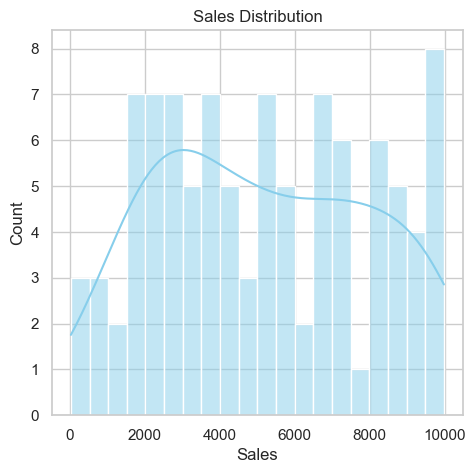

In [50]:
# Histograms

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Sales'], bins=20, kde=True, color='skyblue')
plt.title('Sales Distribution')

Text(0.5, 1.0, 'Profit Distribution')

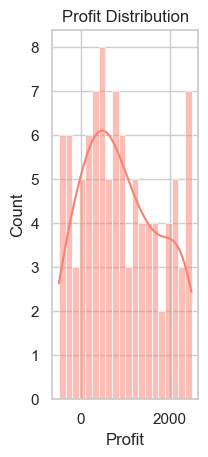

In [51]:
plt.subplot(1, 3, 2)
sns.histplot(df['Profit'], bins=20, kde=True, color='salmon')
plt.title('Profit Distribution')

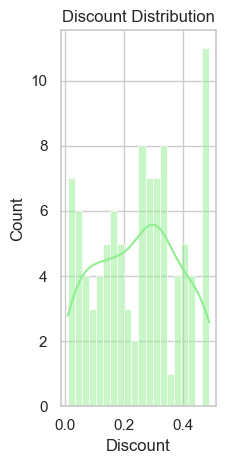

In [52]:
plt.subplot(1, 3, 3)
sns.histplot(df['Discount'], bins=20, kde=True, color='lightgreen')
plt.title('Discount Distribution')
plt.tight_layout()
plt.show()

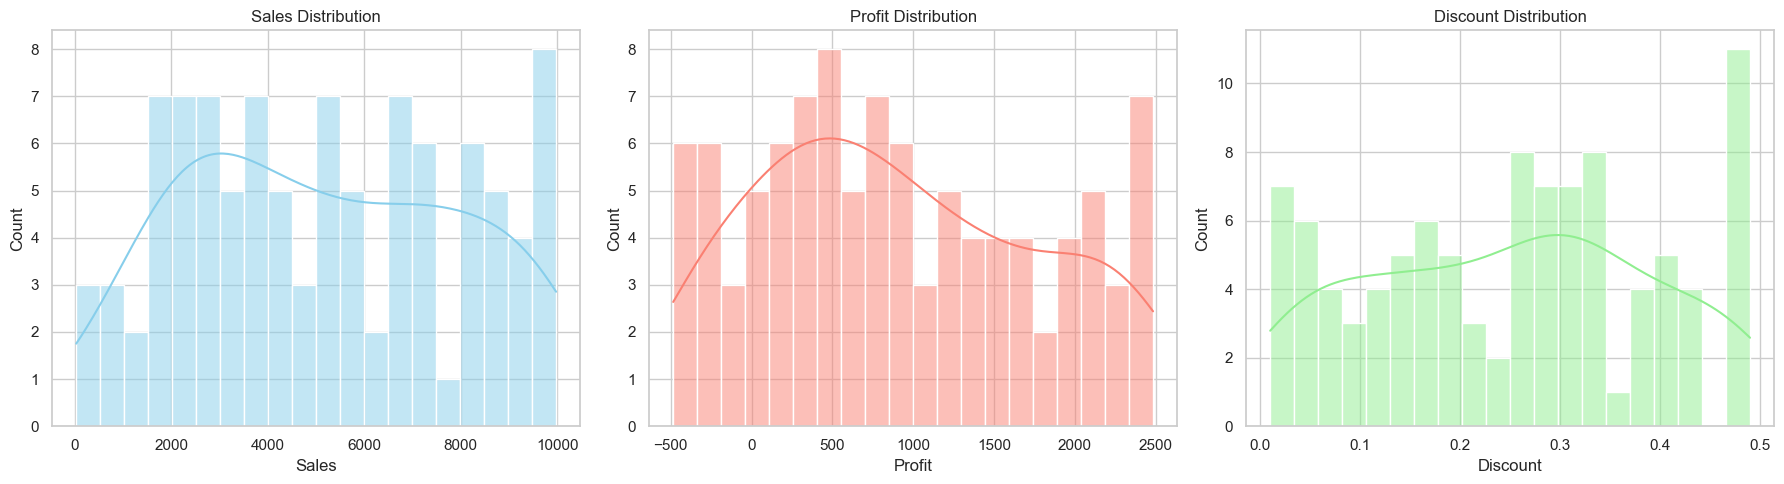

In [53]:
# 4. Data Visualization

sns.set(style="whitegrid")

# Histograms
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Sales'], bins=20, kde=True, color='skyblue')
plt.title('Sales Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Profit'], bins=20, kde=True, color='salmon')
plt.title('Profit Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Discount'], bins=20, kde=True, color='lightgreen')
plt.title('Discount Distribution')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot of Sales')

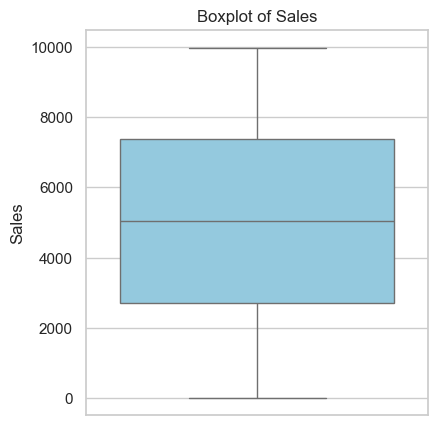

In [54]:
# Boxplots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Sales'], color='skyblue')
plt.title('Boxplot of Sales')

Text(0.5, 1.0, 'Boxplot of Profit')

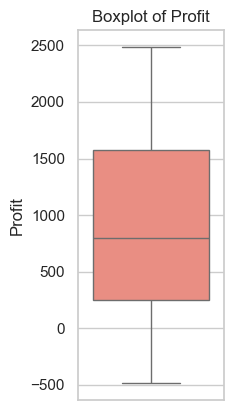

In [55]:
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Profit'], color='salmon')
plt.title('Boxplot of Profit')

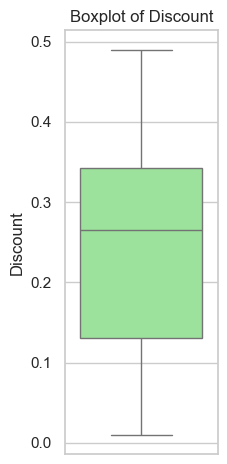

In [56]:
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Discount'], color='lightgreen')
plt.title('Boxplot of Discount')
plt.tight_layout()
plt.show()

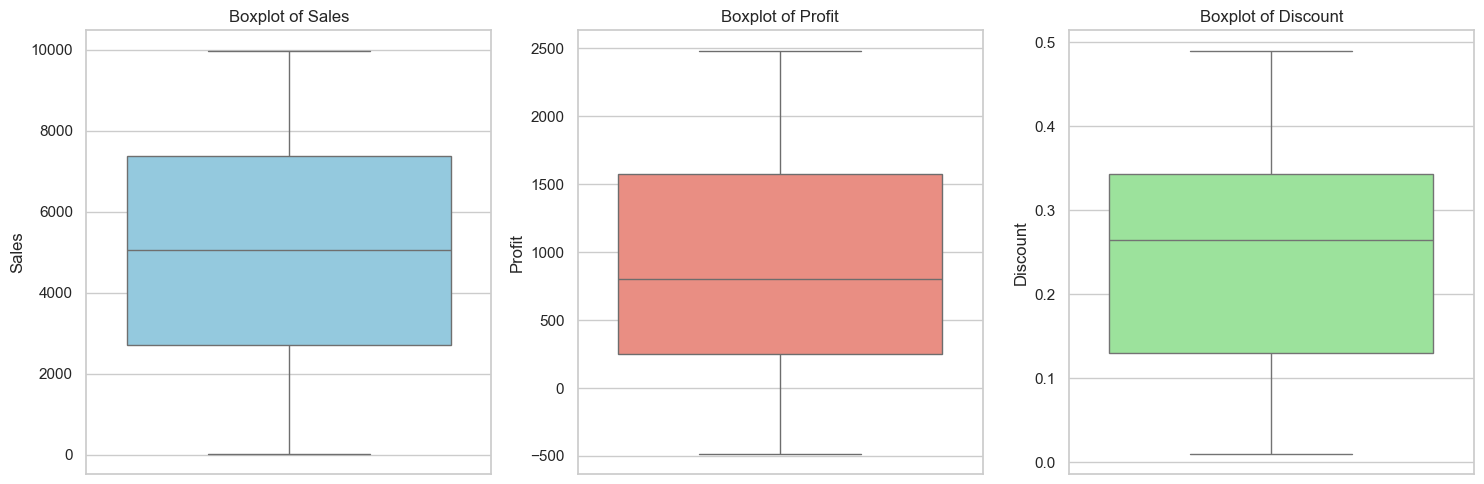

In [57]:
# Boxplots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Sales'], color='skyblue')
plt.title('Boxplot of Sales')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Profit'], color='salmon')
plt.title('Boxplot of Profit')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Discount'], color='lightgreen')
plt.title('Boxplot of Discount')
plt.tight_layout()
plt.show()

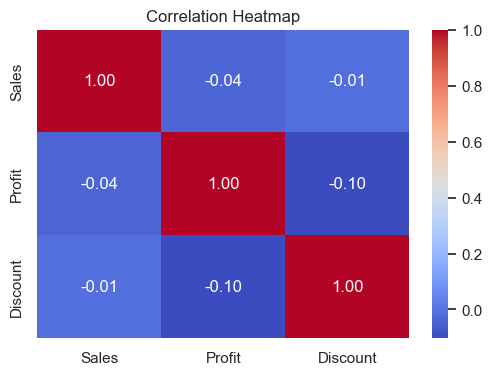

In [58]:
# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Sales', 'Profit', 'Discount']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Project 2: Sales Performance Analysis

**Objective:
Analyze sales data to identify trends, relationships, and factors affecting sales performanc**

In [75]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random

In [76]:
# Set up for reproducibility
np.random.seed(42)
random.seed(42)

In [77]:
# --- Step 1: Generate Dataset ---
num_records = 100
products = ['Laptop', 'Chair', 'Pen', 'Desk', 'Phone', 'Monitor', 'Notebook', 'Printer']
regions = ['North America', 'Europe', 'Asia', 'South America', 'Africa', 'Australia']
categories = ['Technology', 'Furniture', 'Office Supplies']
start_date = datetime(2023, 1, 1)

In [78]:
sales_data = {
    "Product": np.random.choice(products, num_records),
    "Region": np.random.choice(regions, num_records),
    "Sales": np.round(np.random.uniform(20, 10000, num_records), 2),
    "Profit": np.round(np.random.uniform(-500, 2500, num_records), 2),
    "Discount": np.round(np.random.uniform(0, 0.5, num_records), 2),
    "Category": np.random.choice(categories, num_records),
    "Date": [(start_date + timedelta(days=int(x))).strftime('%Y-%m-%d') for x in np.random.randint(0, 730, num_records)]
}

In [85]:
# Load the dataset

df1=pd.read_csv('sales_data.csv')

In [86]:
df1

,Product,Region,Sales,Profit,Discount,Category,Date
0,Notebook,Europe,1238.44,424.18,0.05,Technology,2024-05-27
1,Desk,Europe,3575.85,1127.62,0.09,Office Supplies,2024-01-08
2,Phone,South America,9070.15,1026.44,0.47,Technology,2024-07-19
3,Notebook,Europe,2735.88,1409.00,0.32,Technology,2023-09-16
4,Pen,Europe,6483.95,251.39,0.26,Furniture,2024-10-17
...,...,...,...,...,...,...,...
95,Monitor,South America,4949.06,1565.50,0.05,Technology,2024-01-24
96,Chair,Australia,1804.65,-325.42,0.30,Technology,2024-02-05
97,Desk,Australia,3677.36,2245.64,0.28,Furniture,2024-09-15
98,Monitor,Asia,7446.82,827.06,0.11,Office Supplies,2023-10-30


In [94]:
df1.shape

(100, 7)

In [95]:
df1.dtypes

Product      object
Region       object
Sales       float64
Profit      float64
Discount    float64
Category     object
Date         object
dtype: object

In [96]:
# Display the first few rows

print("First 5 rows of the dataset")
df1.head()

First 5 rows of the dataset


,Product,Region,Sales,Profit,Discount,Category,Date
0,Notebook,Europe,1238.44,424.18,0.05,Technology,2024-05-27
1,Desk,Europe,3575.85,1127.62,0.09,Office Supplies,2024-01-08
2,Phone,South America,9070.15,1026.44,0.47,Technology,2024-07-19
3,Notebook,Europe,2735.88,1409.00,0.32,Technology,2023-09-16
4,Pen,Europe,6483.95,251.39,0.26,Furniture,2024-10-17


In [97]:
# Basic Information about the dataset

print("\nDataset Information:")
df1.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   100 non-null    object 
 1   Region    100 non-null    object 
 2   Sales     100 non-null    float64
 3   Profit    100 non-null    float64
 4   Discount  100 non-null    float64
 5   Category  100 non-null    object 
 6   Date      100 non-null    object 
dtypes: float64(3), object(4)
memory usage: 5.6+ KB


In [98]:
# Handling missing values

print(f"Missing values before cleaning:\n{df1.isnull().sum()}")

Missing values before cleaning:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


In [104]:
# Fill missing numerical values with column mean

df1.fillna(df.mean(numeric_only=True), inplace=True)


print(f"Missing values after cleaning:\n{df1.isnull().sum()}")

Missing values after cleaning:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


In [105]:
# Data Cleaning

df1.drop_duplicates(inplace=True)

In [106]:
# Remove duplicates

df1.drop_duplicates

<bound method DataFrame.drop_duplicates of      Product         Region    Sales   Profit  Discount         Category  \
0   Notebook         Europe  1238.44   424.18      0.05       Technology   
1       Desk         Europe  3575.85  1127.62      0.09  Office Supplies   
2      Phone  South America  9070.15  1026.44      0.47       Technology   
3   Notebook         Europe  2735.88  1409.00      0.32       Technology   
4        Pen         Europe  6483.95   251.39      0.26        Furniture   
..       ...            ...      ...      ...       ...              ...   
95   Monitor  South America  4949.06  1565.50      0.05       Technology   
96     Chair      Australia  1804.65  -325.42      0.30       Technology   
97      Desk      Australia  3677.36  2245.64      0.28        Furniture   
98   Monitor           Asia  7446.82   827.06      0.11  Office Supplies   
99     Phone         Europe  7214.98   219.36      0.47  Office Supplies   

          Date  
0   2024-05-27  
1   2024-0

In [111]:
#  Convert 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df['Date'])

In [112]:
df1['Date']

0    2024-05-27
1    2024-01-08
2    2024-07-19
3    2023-09-16
4    2024-10-17
        ...    
95   2024-01-24
96   2024-02-05
97   2024-09-15
98   2023-10-30
99   2023-07-26
Name: Date, Length: 100, dtype: datetime64[ns]

**Exploratory Data Analysis**

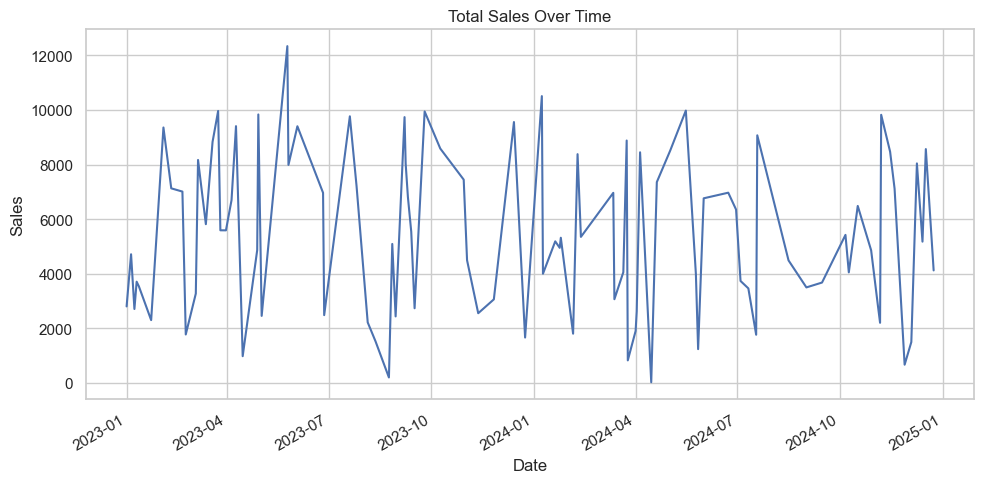

In [113]:
# Plot sales trends over time
# 1. Time series: Sales over time

plt.figure(figsize=(10, 5))
df.groupby('Date')['Sales'].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

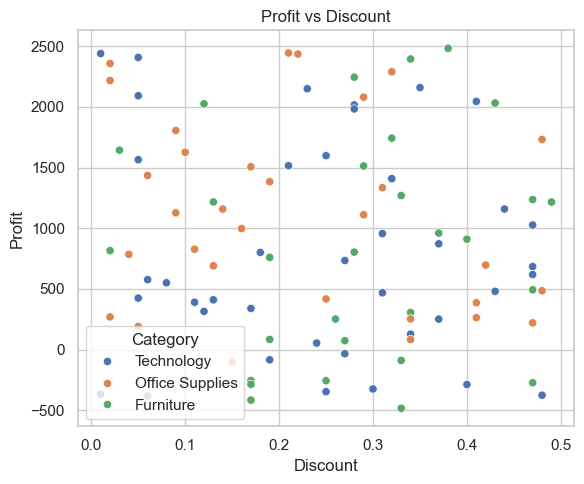

In [114]:
# 2. Scatter plot: Profit vs Discount

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Profit vs Discount")
plt.tight_layout()
plt.show()

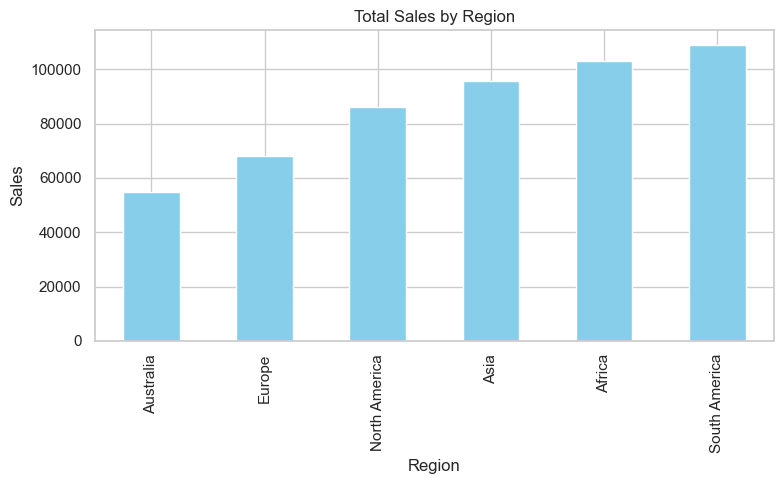

In [115]:
# 3. Bar plot: Sales by Region
# Sales distribution by region

plt.figure(figsize=(8, 5))
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
region_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

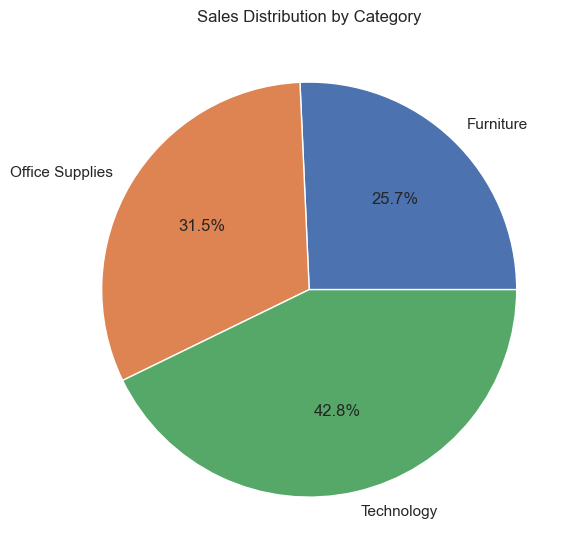

In [116]:
# 4. Pie chart: Sales by Category

plt.figure(figsize=(6, 6))
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.tight_layout()
plt.show()

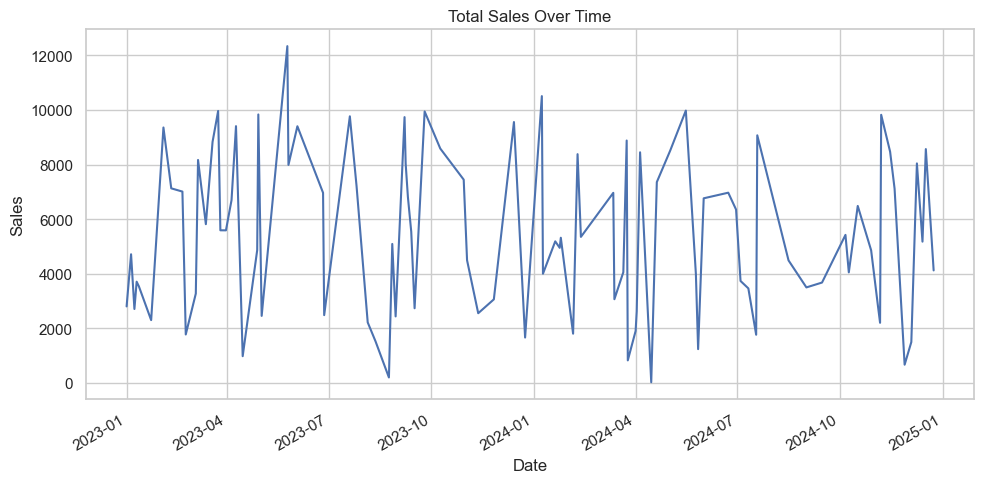

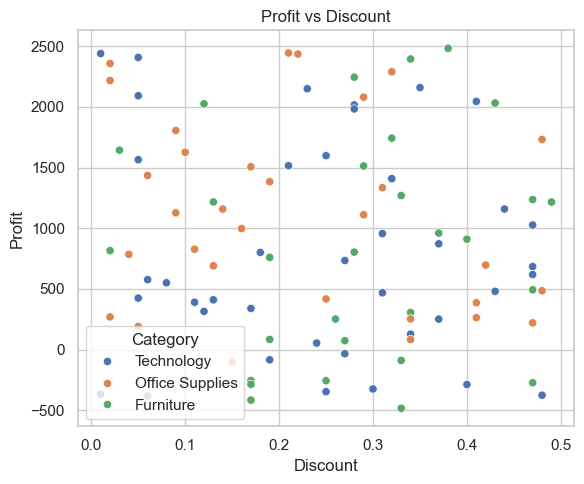

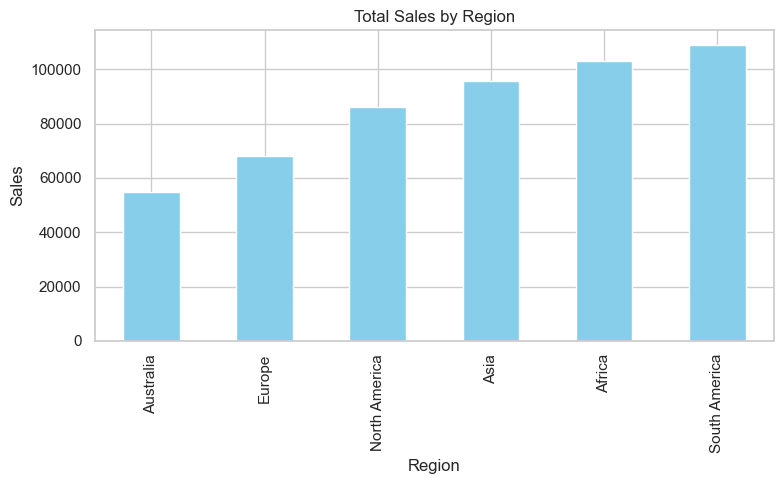

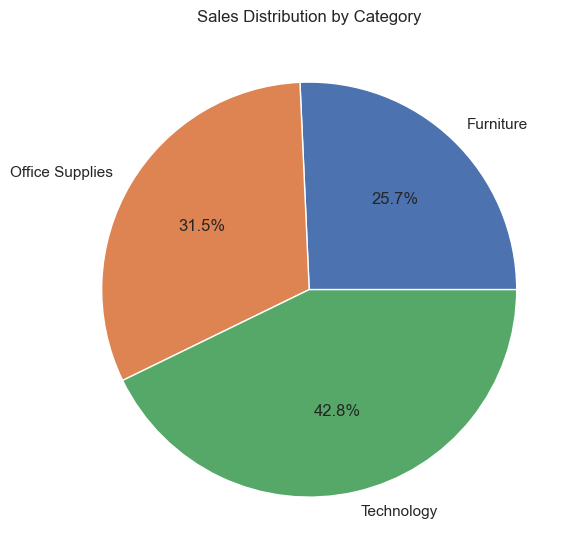

In [117]:
# Plot sales trends over time
# 1. Time series: Sales over time

plt.figure(figsize=(10, 5))
df.groupby('Date')['Sales'].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# 2. Scatter plot: Profit vs Discount

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Profit vs Discount")
plt.tight_layout()
plt.show()

# 3. Bar plot: Sales by Region
# Sales distribution by region

plt.figure(figsize=(8, 5))
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
region_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# 4. Pie chart: Sales by Category

plt.figure(figsize=(6, 6))
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [119]:
# Features and target

X = df[['Profit', 'Discount']]
y = df['Sales']

In [120]:
# Split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Linear Regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [122]:
# Make Predictions

y_pred = model.predict(X_test)

In [123]:
# Evaluation

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [124]:
mse

7924773.40410226

In [125]:
r2

-0.06697430491583356

In [128]:
# Evaluate the model

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")

Mean Squared Error: 7924773.40
R-squared Score: -0.07
